# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\cotil\AppData\Local\Temp\ipykernel_9108\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

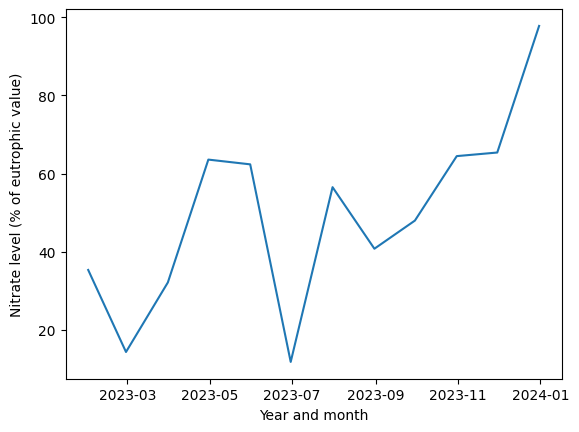

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\cotil\AppData\Local\Temp\ipykernel_9108\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

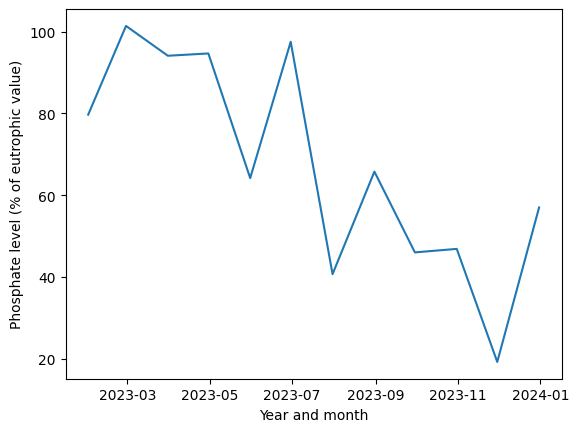

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

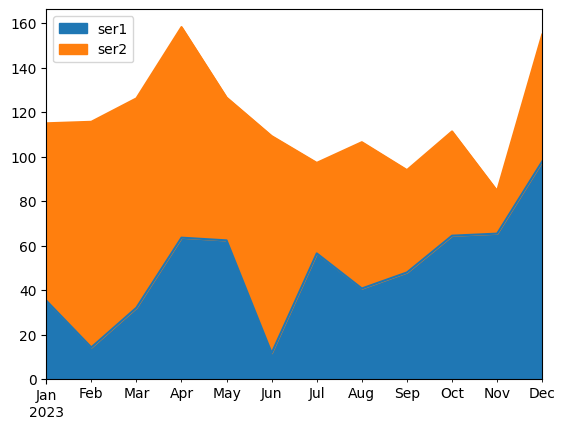

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

Answer: This area plot emphasizes the differences between the phosphate and nitrate levels. This is crucial because it demonstrates key differences in patterns and highlights areas where one type of gas was present, where as the other one was not. One way that I would improve this graph is by labeling which gas is which on the graph that combines both of them.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Diabetes= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\DiabetesHealthcare.csv")
Kidney= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\Chronic_Kidney_Dsease_data.csv")
Hypertension= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\hypertension_dataset.csv")


Text(0.5, 1.0, 'BMI distribution by diabetes status')

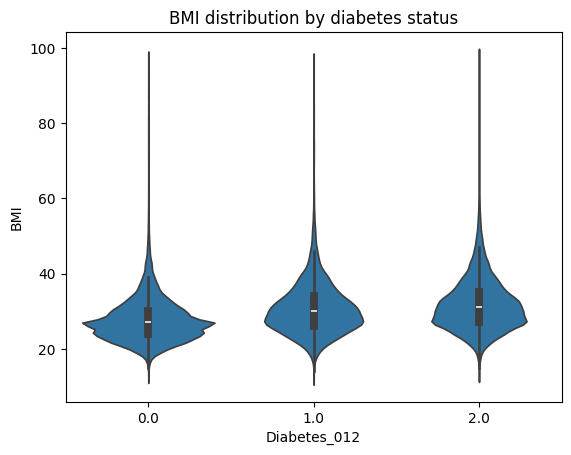

In [8]:
sns.violinplot(data=Diabetes, x='Diabetes_012', y='BMI')
plt.title("BMI distribution by diabetes status")
#This plot shows slightly higher diabetes rate, when comparing 1 and 2 to 0 (No Diabetes).
# This further shows the distinction between 0 vs 1/2.
# This violinplot is difficult to read for this data. Lets try a histplot. 

Text(0.5, 1.0, 'BMI by Diabetes Group')

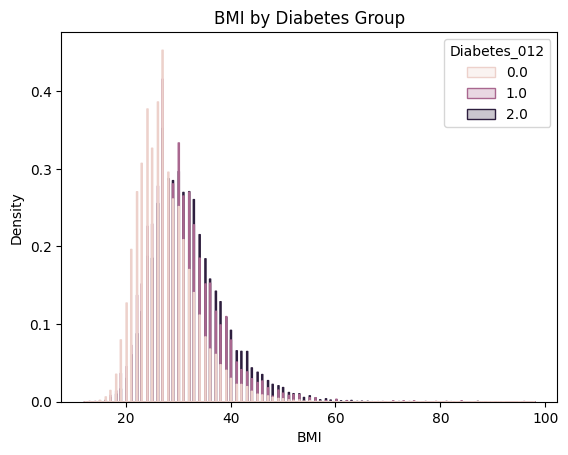

In [9]:

sns.histplot(data=Diabetes, x='BMI', hue='Diabetes_012', element='step', stat='density', common_norm=False)
plt.title("BMI by Diabetes Group")

# 0 = no diabetes 1 = prediabetes 2 = diabetes
#People with higher BMI showed higher signs of diabetes. This is much easier to read. 

Text(0.5, 1.0, 'Diabetes and MentHlth')

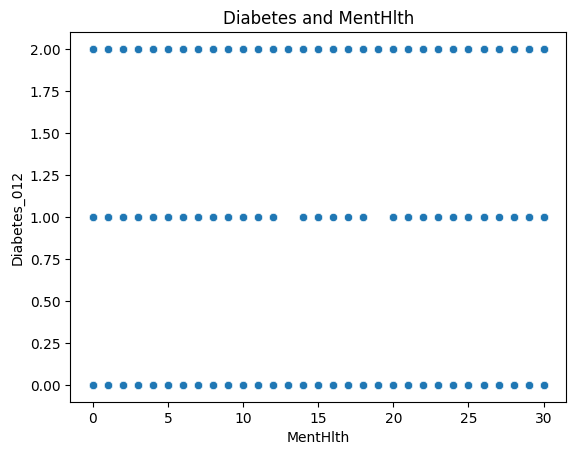

In [10]:
sns.scatterplot(data=Diabetes, x='MentHlth', y='Diabetes_012')
plt.title("Diabetes and MentHlth")

#No strong correlation directly relating to Diabetes Diagnosis

Text(0.5, 1.0, 'Diabetes and GenHlth')

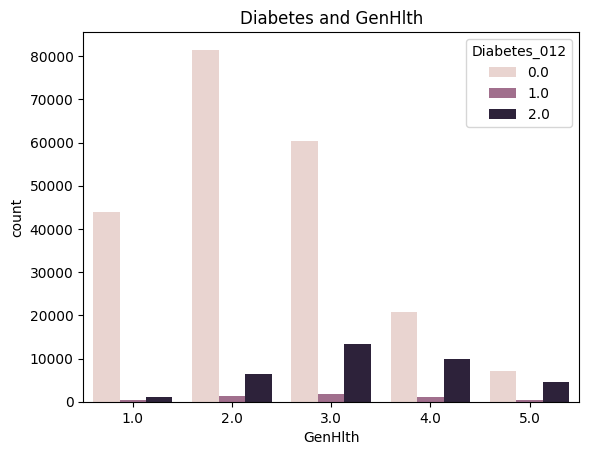

In [11]:
sns.countplot(data=Diabetes, x='GenHlth', hue='Diabetes_012')
plt.title("Diabetes and GenHlth")

#Note from codebook-- Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

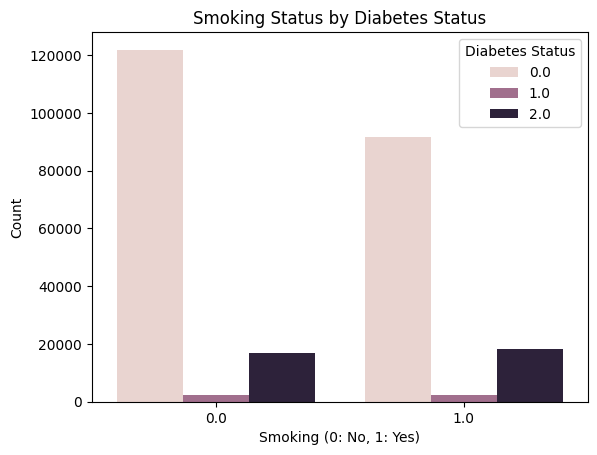

In [12]:
sns.countplot(x='Smoker', hue='Diabetes_012', data=Diabetes)
plt.title('Smoking Status by Diabetes Status')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
#No correlation for this bivariate comparison

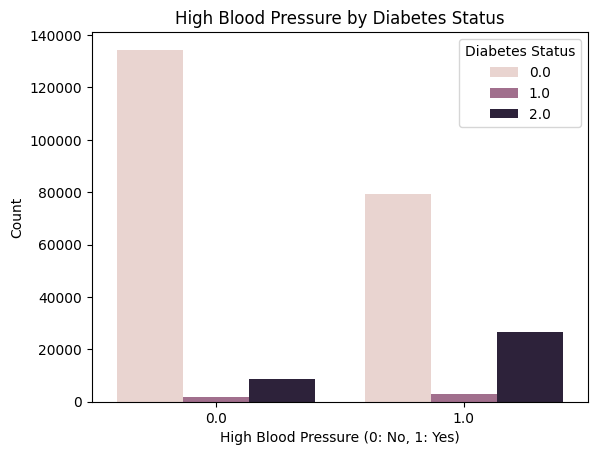

In [13]:
sns.countplot(x='HighBP', hue='Diabetes_012', data=Diabetes)
plt.title('High Blood Pressure by Diabetes Status')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
#Majority of those with diabetes had higher bloodpressure.

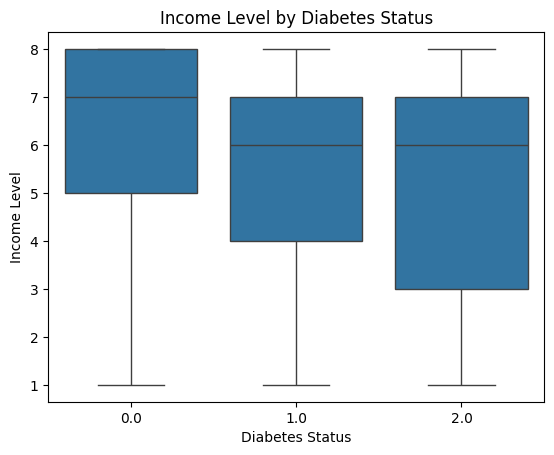

In [14]:
sns.boxplot(x='Diabetes_012', y='Income', data=Diabetes)
plt.title('Income Level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Income Level')
plt.show()

# scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
#Those with the highest income do not have diabetes

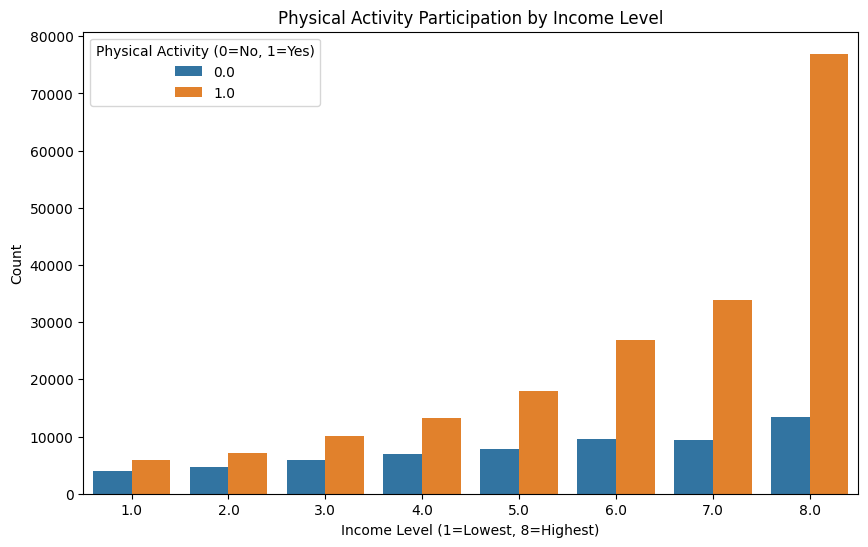

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='PhysActivity', data=Diabetes)
plt.title('Physical Activity Participation by Income Level')
plt.xlabel('Income Level (1=Lowest, 8=Highest)')
plt.ylabel('Count')
plt.legend(title='Physical Activity (0=No, 1=Yes)')

C:\Users\cotil\AppData\Local\Temp\ipykernel_9108\1520634483.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


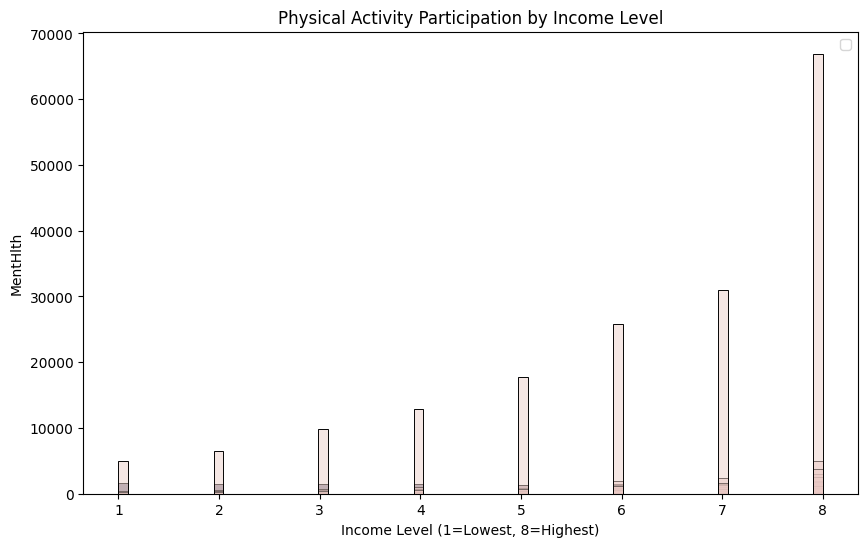

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x='Income', hue='MentHlth', data=Diabetes)
plt.title('Physical Activity Participation by Income Level')
plt.xlabel('Income Level (1=Lowest, 8=Highest)')
plt.ylabel('MentHlth')
plt.legend()
#Those with greater income reported better Mental Health

Text(0.5, 1.0, 'Diabetes and Physical Activity')

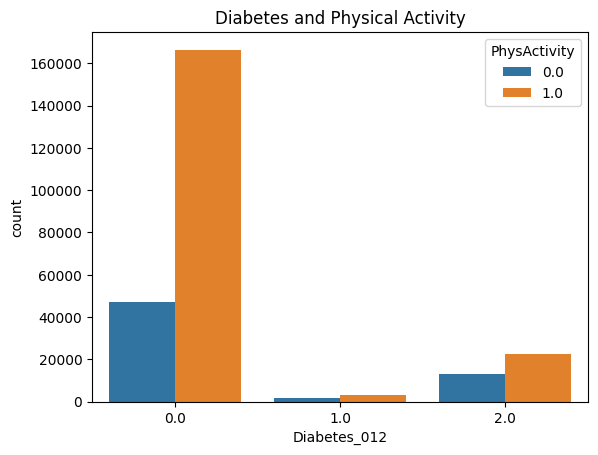

In [17]:
sns.countplot(data=Diabetes, x='Diabetes_012', hue='PhysActivity')
plt.title("Diabetes and Physical Activity")

#Those with no diabetes did workout in the past 30 days,
#Note from codebook-- now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

Kidney Data:


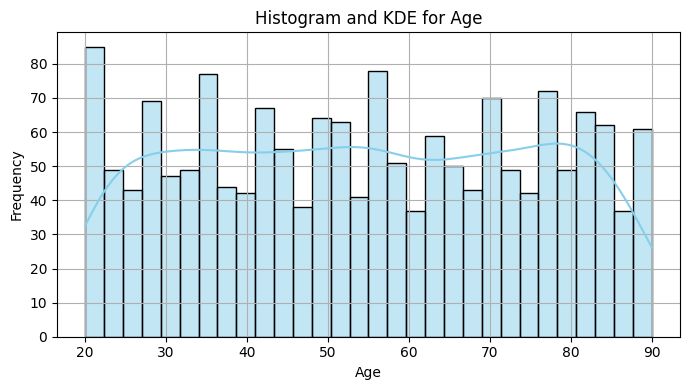

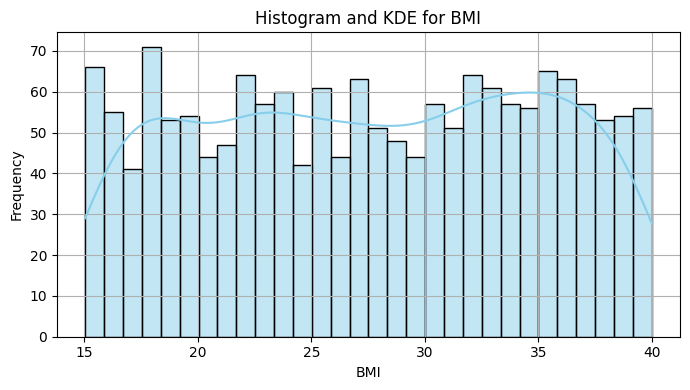

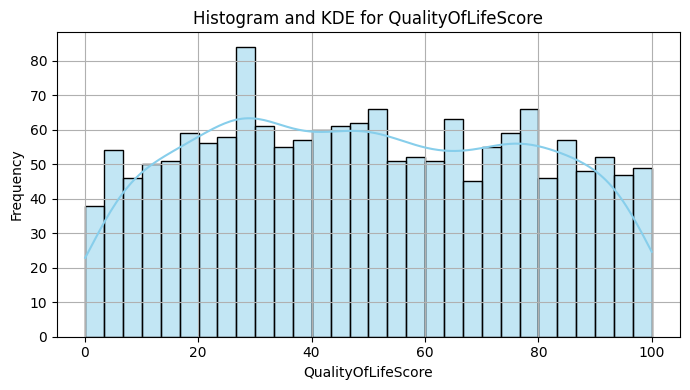

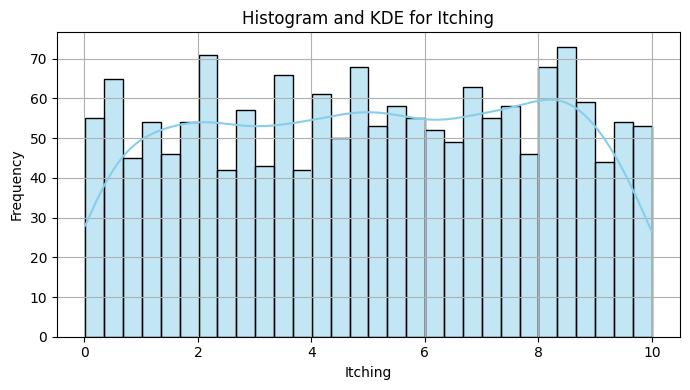

In [19]:
columnsanalysis= ["Age","BMI", "QualityOfLifeScore","Itching"]
for col in columnsanalysis:
    plt.figure(figsize=(7, 4))
    sns.histplot(Kidney[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()

#Notes: 
# QualityOfLifeScore: Quality of life score, ranging from 0 to 100.
# BMI: Body Mass Index of the patients, ranging from 15 to 40.
# Age: The age of the patients ranges from 20 to 90 years.
# Itching: Itching severity, ranging from 0 to 10.


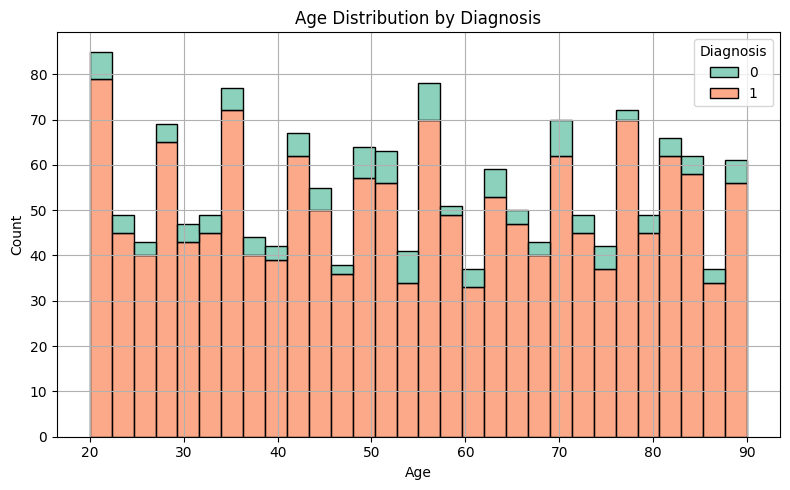

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=Kidney, x='Age', hue='Diagnosis', multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

#Diagnosis: 0= No, 1=Yes

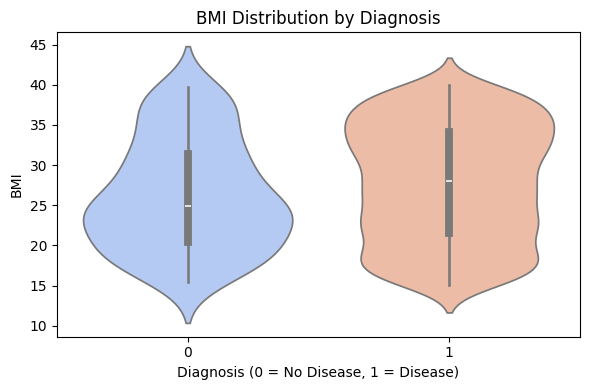

In [21]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=Kidney, x='Diagnosis', y='BMI', hue='Diagnosis', palette='coolwarm', legend=False)
plt.title('BMI Distribution by Diagnosis')
plt.xlabel('Diagnosis (0 = No Disease, 1 = Disease)')
plt.ylabel('BMI')
plt.tight_layout()

#Demonstrates now that large of a distinction between BMI and Kidney disease

Text(0, 0.5, 'Diagnosis')

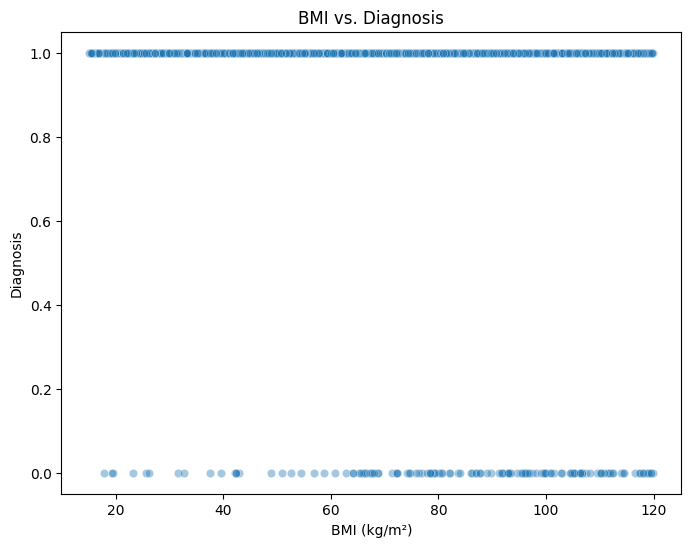

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GFR', y='Diagnosis', data=Kidney, alpha=0.4)
plt.title('BMI vs. Diagnosis')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Diagnosis')


Text(0, 0.5, 'Diagnosis')

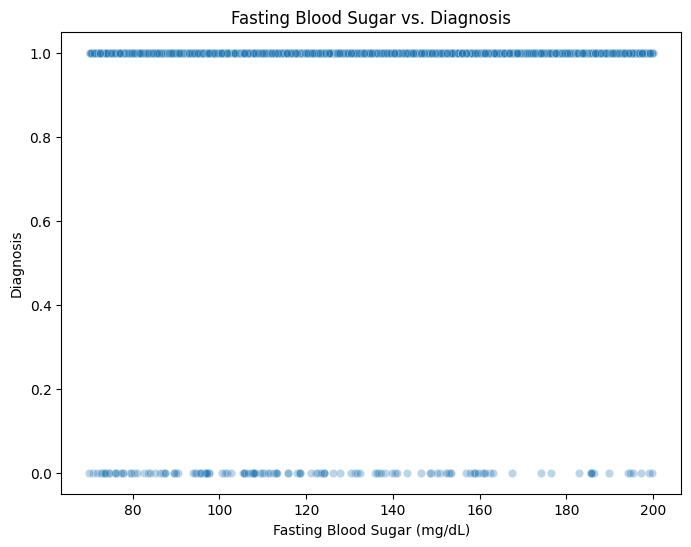

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='FastingBloodSugar', y='Diagnosis', data=Kidney, alpha=0.3)
plt.title('Fasting Blood Sugar vs. Diagnosis')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('Diagnosis')


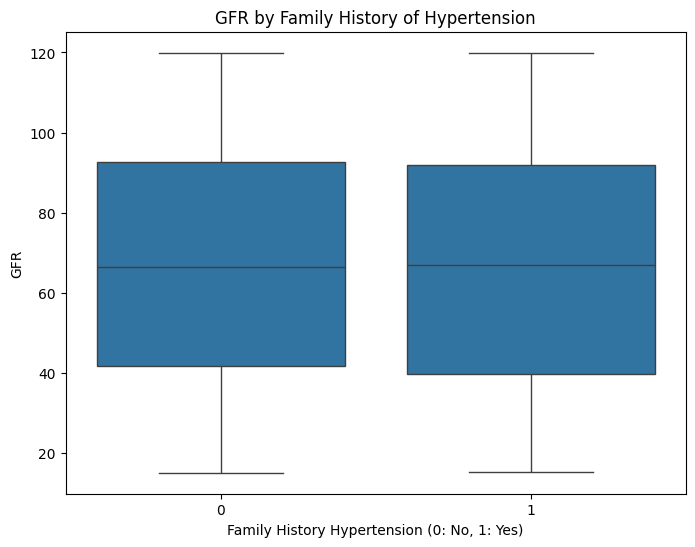

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='FamilyHistoryHypertension', y='GFR', data=Kidney)
plt.title('GFR by Family History of Hypertension')
plt.xlabel('Family History Hypertension (0: No, 1: Yes)')
plt.ylabel('GFR')
plt.show()

<Axes: xlabel='Diagnosis', ylabel='SerumCreatinine'>

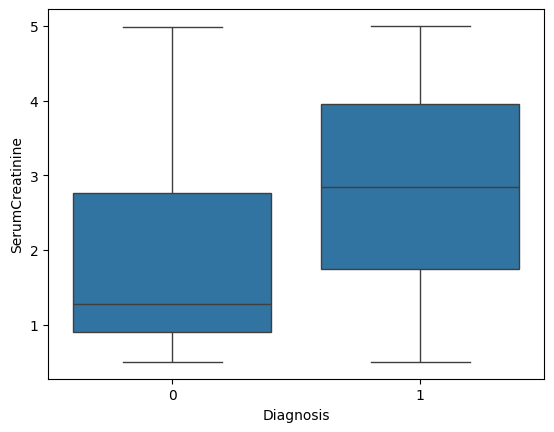

In [25]:
sns.boxplot(x='Diagnosis', y='SerumCreatinine', data=Kidney)
# SerumCreatinine: Serum creatinine levels, ranging from 0.5 to 5.0 mg/dL.

Text(0.5, 1.0, 'Fatigue Levels by Diagnosis')

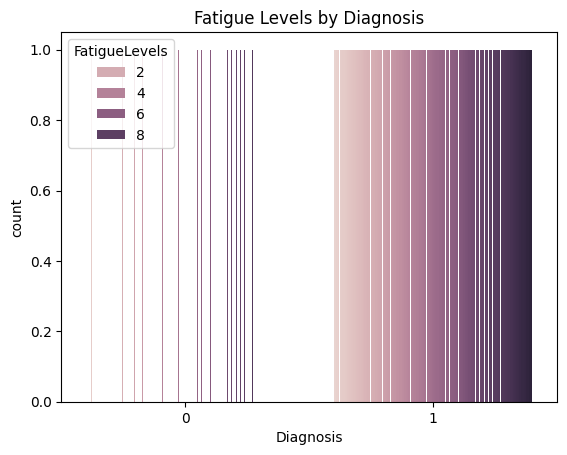

In [26]:
sns.countplot(data=Kidney, x='Diagnosis', hue='FatigueLevels')
plt.title('Fatigue Levels by Diagnosis')

#Note:  Fatigue levels, ranging from 0 to 10.


Text(0.5, 1.0, 'Quality of Life by Diagnosis')

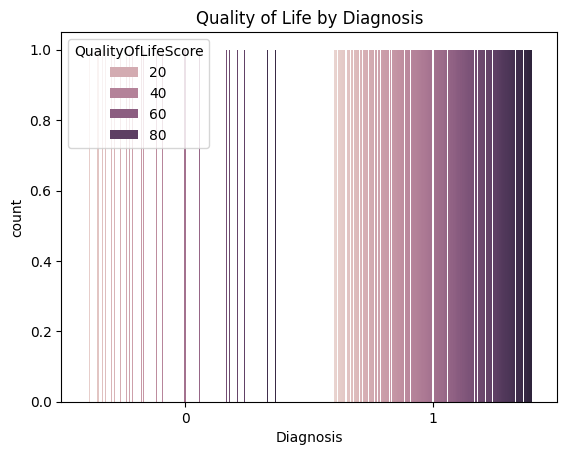

In [27]:
sns.countplot(data=Kidney, x='Diagnosis', hue='QualityOfLifeScore')
plt.title('Quality of Life by Diagnosis')


Hypertension Data:

Text(0.5, 1.0, 'Hypertension Distribution by Age')

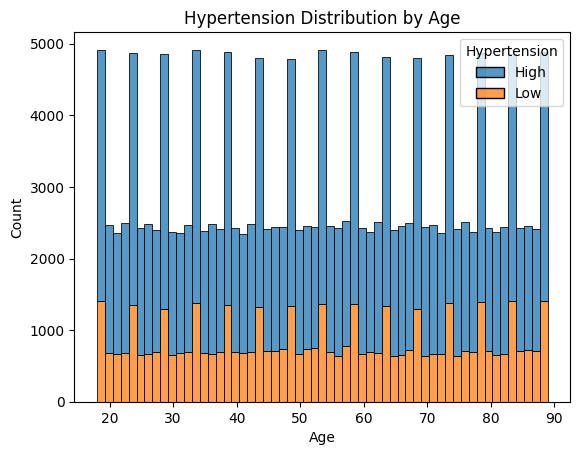

In [28]:
sns.histplot(data=Hypertension, x='Age', hue='Hypertension', multiple='stack')
plt.title('Hypertension Distribution by Age')

Text(0.5, 1.0, 'Hypertension by Gender')

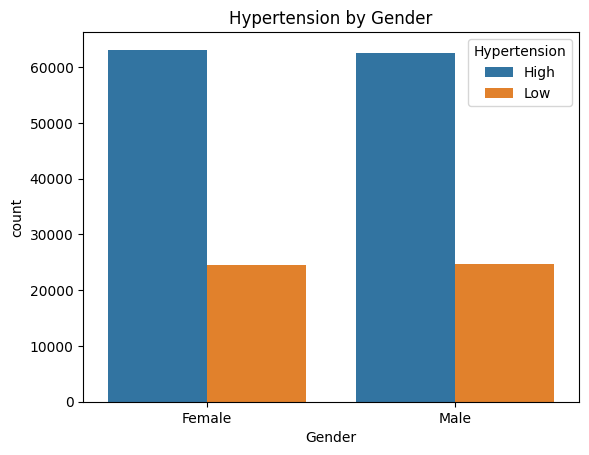

In [29]:
sns.countplot(data=Hypertension, x='Gender', hue='Hypertension')
plt.title('Hypertension by Gender')

Text(0.5, 1.0, 'Hypertension by Country')

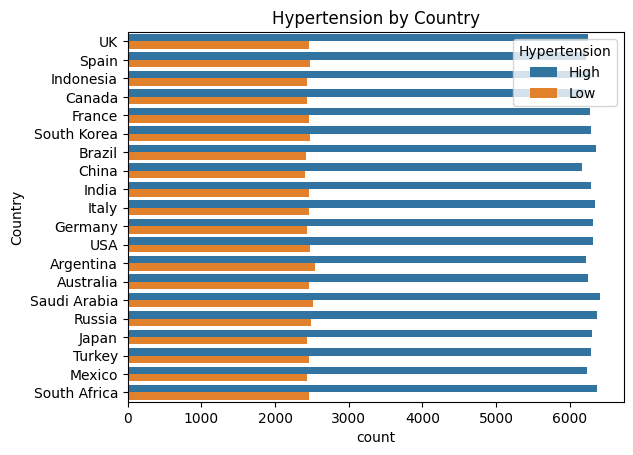

In [30]:
sns.countplot(data=Hypertension, y='Country', hue='Hypertension')
plt.title('Hypertension by Country')

Text(0.5, 1.0, 'Hypertension by Physical Activity')

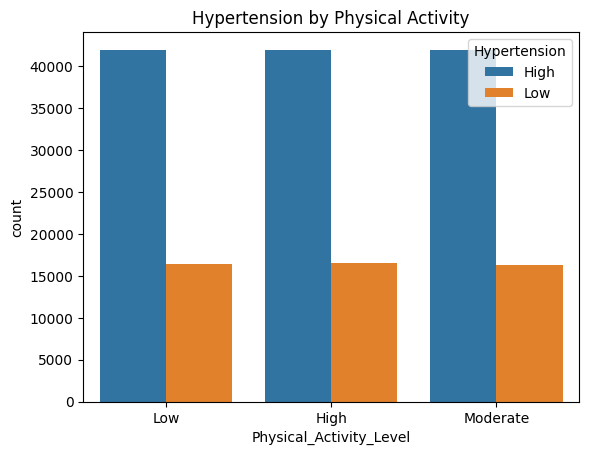

In [31]:
sns.countplot(data=Hypertension, x='Physical_Activity_Level', hue='Hypertension')
plt.title('Hypertension by Physical Activity')

Text(0.5, 1.0, 'Family History and Hypertension')

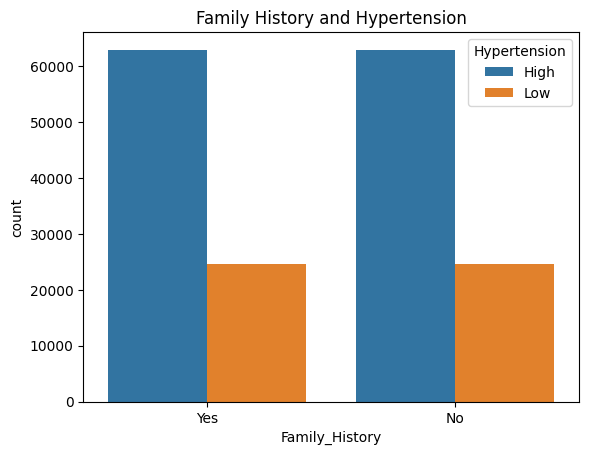

In [32]:
sns.countplot(data=Hypertension, x='Family_History', hue='Hypertension')
plt.title('Family History and Hypertension')

Text(0, 0.5, 'BMI')

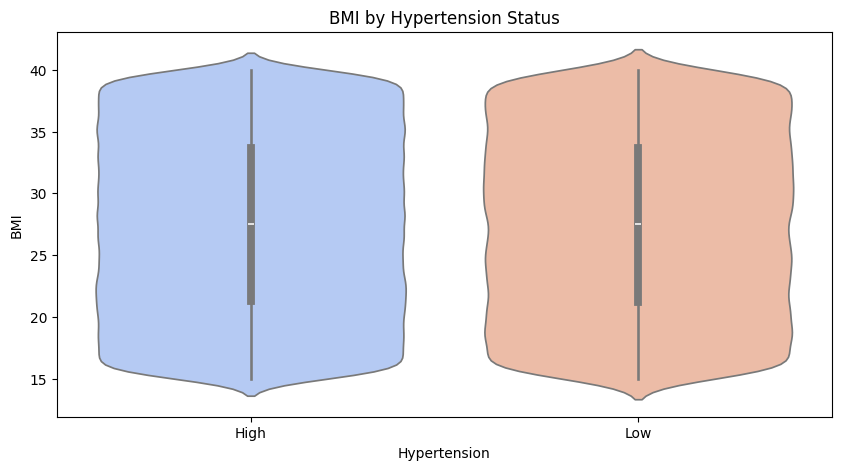

In [33]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=Hypertension, x="Hypertension", y="BMI", hue="Hypertension", palette='coolwarm', legend=False)
plt.title("BMI by Hypertension Status")
plt.xlabel("Hypertension")
plt.ylabel("BMI")

#Target Variable: Hypertension (High / Low)

Text(0, 0.5, 'Count')

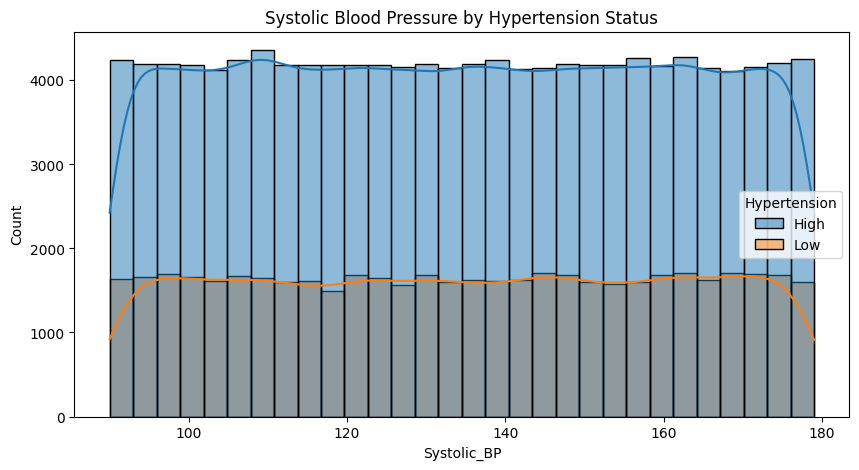

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=Hypertension, x="Systolic_BP", hue="Hypertension", kde=True, bins=30)
plt.title("Systolic Blood Pressure by Hypertension Status")
plt.xlabel("Systolic_BP")
plt.ylabel("Count")

Text(0.5, 1.0, 'Glucose Levels by Hypertension')

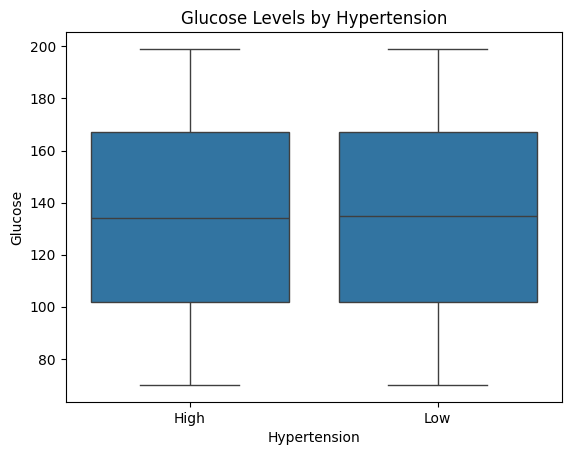

In [35]:
sns.boxplot(data=Hypertension, x='Hypertension', y='Glucose')
plt.title('Glucose Levels by Hypertension')

Text(0.5, 1.0, 'Diastolic BP by Hypertension')

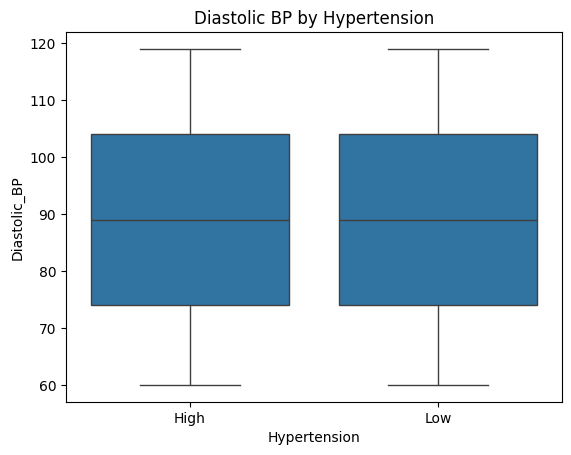

In [36]:
sns.boxplot(data=Hypertension, x='Hypertension', y='Diastolic_BP')
plt.title('Diastolic BP by Hypertension')

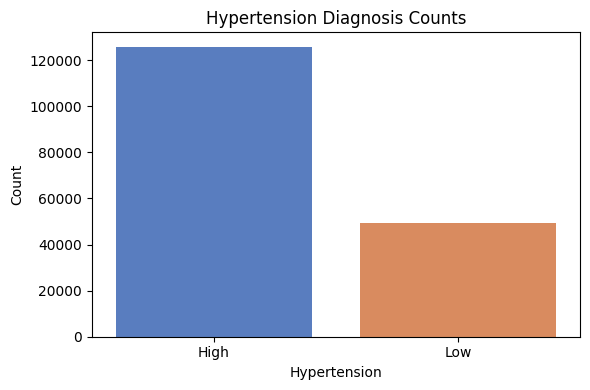

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Hypertension, x="Hypertension", hue="Hypertension", palette="muted", legend=False)
plt.title("Hypertension Diagnosis Counts")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.tight_layout()

#Target Variable: Hypertension (High / Low)


Answer:

Upon analyzing the hypertension, diabetes, and CKD datasets, the data appear generally usable, containing expected variables such as age, BMI, blood pressure, and glucose levels, though some missing values and inconsistent units will require cleaning before modeling. Outliers are present, such as extremely high glucose levels in the diabetes dataset, unusually low blood pressure readings in hypertension data, and anomalous creatinine levels in CKD data, which should be assessed for validity as they could represent true clinical emergencies or data entry errors. High correlations were observed, such as between BMI and weight, systolic and diastolic blood pressure in hypertension, and blood urea nitrogen with creatinine in CKD, suggesting redundancy that could affect model interpretability. Line plots over time, where available, show stable variable distributions without significant drift, indicating comparisons remain valid; however, if time-based data were longitudinal, disease progression could show upward trends requiring temporal modeling. Potential confounding variables across these datasets include socioeconomic status (affecting diet, medication access, and disease prevalence), medication use (impacting blood pressure or glucose levels), and age (influencing kidney function, hypertension, and diabetes simultaneously). These confounders should be addressed to ensure accurate association and prediction analyses in your upcoming health data science work.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

Text(10.1, 3.1, 'Phosphate')

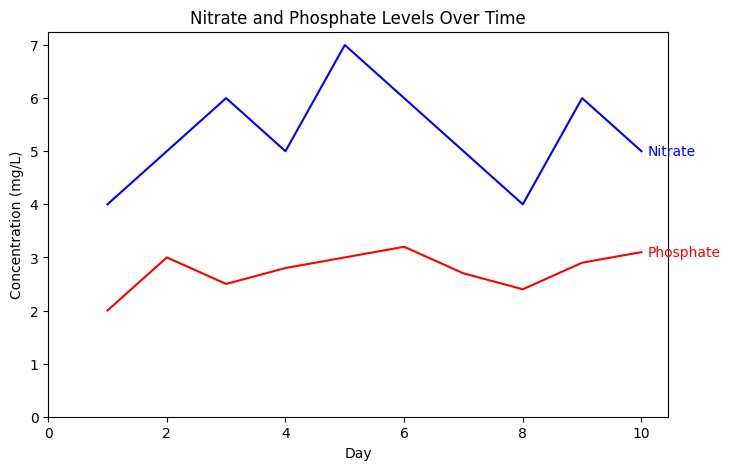

In [5]:
import matplotlib.pyplot as plt
days = list(range(1, 11))
nitrate = [4, 5, 6, 5, 7, 6, 5, 4, 6, 5]
phosphate = [2, 3, 2.5, 2.8, 3, 3.2, 2.7, 2.4, 2.9, 3.1]
plt.figure(figsize=(8, 5))
plt.plot(days, nitrate, linestyle='-', color='blue', label='Nitrate (mg/L)')
plt.plot(days, phosphate,  linestyle='-', color='red', label='Phosphate (mg/L)')
plt.title('Nitrate and Phosphate Levels Over Time')
plt.xlabel('Day')
plt.ylabel('Concentration (mg/L)')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(days[-1] + 0.1, nitrate[-1], 'Nitrate', color='blue', va='center', fontsize=10)
plt.text(days[-1] + 0.1, phosphate[-1], 'Phosphate', color='red', va='center', fontsize=10)


#Created two different lists-- each of which has no data markers, gridlines, both axis' start at 0, and labels the different lines as directly as possible. 
#This is shown in pages 92-96